# Basic data analysis

This notebook is mainly a playground / ad-hoc analysis of already labeled data.

In [1]:
from pathlib import Path
import pandas as pd
import plotly.io as pio

pio.renderers.default = "vscode"

In [ ]:
base_data_path = Path('../data')
annotations_path = base_data_path / 'annotation_per_row_data.csv'
audio_data_path = base_data_path / 'audio'

list(audio_data_path.glob('*.wav'))

[PosixPath('../data/audio/recording_2024-11-15_14-10-35.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-21-59.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-32-41.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-18-08.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-22-18.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-26-00.wav'),
 PosixPath('../data/audio/recording_2024-10-30_19-34.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-17-18.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-34-56.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-21-09.wav'),
 PosixPath('../data/audio/recording_2024-11-15_11-18-42.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-17-46.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-22-10.wav'),
 PosixPath('../data/audio/recording_2024-11-15_11-01-44.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-15-56.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-22-17.wa

In [ ]:
annotations = pd.read_csv(annotations_path)

# fix audio data path

old_data_path_prefix = '/data/local-files/?d=bell_detector_data/raw_data'

annotations.audio_path = annotations.audio_path.apply(lambda file_uri: file_uri.replace(old_data_path_prefix, str(audio_data_path)))
annotations

Unnamed: 0  annotation_id  \
0             0            568   
1             1            433   
2             2            565   
3             3            629   
4             4            325   
..          ...            ...   
673         673            279   
674         674            417   
675         675            145   
676         676             15   
677         677            327   

                                          audio_path  file_id  start   end  \
0    ../data/audio/recording_2024-11-15_13-26-47.wav      419    0.0   7.0   
1    ../data/audio/recording_2024-11-15_11-13-15.wav      232    0.0   7.0   
2    ../data/audio/recording_2024-11-15_13-23-33.wav      416    0.0   7.0   
3    ../data/audio/recording_2024-11-15_14-13-07.wav      480    0.0   7.0   
4    ../data/audio/recording_2024-11-15_14-18-31.wav      524    0.0   7.0   
..                                               ...      ...    ...   ...   
673  ../data/audio/recording_2024-11-15_12-55-06.wav      378    0.0   7.0   
674  ../data/audio/recording_2024-11-15_11-01-08.wav      216    0.0   7.0   
675  ../data/audio/recording_2024-11-15_09-31-51.wav      144    0.0   7.0   
676     ../data/audio/recording_2024-10-25_14-51.wav       14    0.0  33.5   
677  ../data/audio/recording_2024-11-15_14-18-45.wav      526    0.0   7.0   

          label  
0    background  
1    background  
2    background  
3    background  
4    background  
..          ...  
673  background  
674  background  
675  background  
676  background  
677  background  

[678 rows x 7 columns]

In [4]:
filtered_annotations = annotations[annotations['label'].isin(['gardendoor_bell', 'housedoor_bell', 'flatdoor_bell'])]
filtered_annotations

Unnamed: 0  annotation_id  \
56           56             18   
79           79             31   
166         166             20   
175         175             69   
207         207            654   
210         210            656   
241         241             68   
261         261             60   
305         305             63   
317         317            103   
327         327             39   
329         329             39   
331         331             39   
334         334             44   
362         362             61   
445         445             14   
446         446             14   
447         447             14   
448         448             14   
493         493             13   
501         501             67   
520         520             42   
544         544             65   
545         545             65   
565         565             32   
645         645             64   
658         658             62   

                                          audio_path  file_id       start  \
56      ../data/audio/recording_2024-10-25_16-04.wav       17  202.883038   
79      ../data/audio/recording_2024-10-27_12-22.wav       30    1.054482   
166     ../data/audio/recording_2024-10-26_15-00.wav       19    8.119508   
175  ../data/audio/recording_2024-11-14_15-57-50.wav       69    0.000000   
207     ../data/audio/recording_2024-12-04_15-05.wav      654    1.712998   
210     ../data/audio/recording_2024-12-17_15-23.wav      656    6.172382   
241  ../data/audio/recording_2024-11-14_15-57-43.wav       68    0.000000   
261  ../data/audio/recording_2024-11-14_15-55-50.wav       60    0.350365   
305  ../data/audio/recording_2024-11-14_15-56-25.wav       63    0.291971   
317     ../data/audio/recording_2024-11-16_11-43.wav      651    3.038898   
327     ../data/audio/recording_2024-11-02_15-50.wav       38    0.000000   
329     ../data/audio/recording_2024-11-02_15-50.wav       38   29.571429   
331     ../data/audio/recording_2024-11-02_15-50.wav       38   40.622163   
334     ../data/audio/recording_2024-11-08_11-29.wav       43    0.738462   
362  ../data/audio/recording_2024-11-14_15-56-04.wav       61    0.525547   
445               ../data/audio/2024-10-24-15-53.wav       13   22.613192   
446               ../data/audio/2024-10-24-15-53.wav       13   28.778695   
447               ../data/audio/2024-10-24-15-53.wav       13   37.389764   
448               ../data/audio/2024-10-24-15-53.wav       13   45.938129   
493          ../data/audio/record-24-10-02-19-34.wav       12   32.967327   
501  ../data/audio/recording_2024-11-14_15-57-36.wav       67    0.428224   
520     ../data/audio/recording_2024-11-06_17-40.wav       41   11.372308   
544  ../data/audio/recording_2024-11-14_15-56-45.wav       65    0.000000   
545  ../data/audio/recording_2024-11-14_15-56-45.wav       65    0.807786   
565     ../data/audio/recording_2024-10-27_15-04.wav       31    0.000000   
645  ../data/audio/recording_2024-11-14_15-56-38.wav       64    0.233577   
658  ../data/audio/recording_2024-11-14_15-56-14.wav       62    0.545012   

            end            label  
56   207.923135   housedoor_bell  
79     8.752197  gardendoor_bell  
166   14.257469  gardendoor_bell  
175    0.622871   housedoor_bell  
207    6.942149   housedoor_bell  
210   11.177016   housedoor_bell  
241    0.827251   housedoor_bell  
261    3.493917    flatdoor_bell  
305    3.639903    flatdoor_bell  
317    7.925446   housedoor_bell  
327    3.535714  gardendoor_bell  
329   34.328772   housedoor_bell  
331   45.000000    flatdoor_bell  
334    5.907692   housedoor_bell  
362    4.934307   housedoor_bell  
445   25.768507    flatdoor_bell  
446   32.027824    flatdoor_bell  
447   41.739658   housedoor_bell  
448   50.814638   housedoor_bell  
493   37.461622   housedoor_bell  
501    4.778589   housedoor_bell  
520   16.763077   housedoor_bell  
544    0.798054    flatdoor_bell  
545    8.000000    flatdoor_bell  
565    3.479789   ho

In [ ]:
filtered_annotations.insert(3, 'duration', filtered_annotations.end - filtered_annotations.start)
filtered_annotations

Unnamed: 0  annotation_id  \
56           56             18   
79           79             31   
166         166             20   
175         175             69   
207         207            654   
210         210            656   
241         241             68   
261         261             60   
305         305             63   
317         317            103   
327         327             39   
329         329             39   
331         331             39   
334         334             44   
362         362             61   
445         445             14   
446         446             14   
447         447             14   
448         448             14   
493         493             13   
501         501             67   
520         520             42   
544         544             65   
545         545             65   
565         565             32   
645         645             64   
658         658             62   

                                          audio_path  duration  file_id  \
56      ../data/audio/recording_2024-10-25_16-04.wav  5.040097       17   
79      ../data/audio/recording_2024-10-27_12-22.wav  7.697715       30   
166     ../data/audio/recording_2024-10-26_15-00.wav  6.137961       19   
175  ../data/audio/recording_2024-11-14_15-57-50.wav  0.622871       69   
207     ../data/audio/recording_2024-12-04_15-05.wav  5.229151      654   
210     ../data/audio/recording_2024-12-17_15-23.wav  5.004634      656   
241  ../data/audio/recording_2024-11-14_15-57-43.wav  0.827251       68   
261  ../data/audio/recording_2024-11-14_15-55-50.wav  3.143552       60   
305  ../data/audio/recording_2024-11-14_15-56-25.wav  3.347932       63   
317     ../data/audio/recording_2024-11-16_11-43.wav  4.886548      651   
327     ../data/audio/recording_2024-11-02_15-50.wav  3.535714       38   
329     ../data/audio/recording_2024-11-02_15-50.wav  4.757343       38   
331     ../data/audio/recording_2024-11-02_15-50.wav  4.377837       38   
334     ../data/audio/recording_2024-11-08_11-29.wav  5.169231       43   
362  ../data/audio/recording_2024-11-14_15-56-04.wav  4.408759       61   
445               ../data/audio/2024-10-24-15-53.wav  3.155315       13   
446               ../data/audio/2024-10-24-15-53.wav  3.249130       13   
447               ../data/audio/2024-10-24-15-53.wav  4.349894       13   
448               ../data/audio/2024-10-24-15-53.wav  4.876509       13   
493          ../data/audio/record-24-10-02-19-34.wav  4.494295       12   
501  ../data/audio/recording_2024-11-14_15-57-36.wav  4.350365       67   
520     ../data/audio/recording_2024-11-06_17-40.wav  5.390769       41   
544  ../data/audio/recording_2024-11-14_15-56-45.wav  0.798054       65   
545  ../data/audio/recording_2024-11-14_15-56-45.wav  7.192214       65   
565     ../data/audio/recording_2024-10-27_15-04.wav  3.479789       31   
645  ../data/audio/recording_2024-11-14_15-56-38.wav  3.669100       64   
658  ../data/audio/recording_2024-11-14_15-56-14.wav  4.350365       62   

          start         end            label  
56   202.883038  207.923135   housedoor_bell  
79     1.054482    8.752197  gardendoor_bell  
166    8.119508   14.257469  gardendoor_bell  
175    0.000000    0.622871   housedoor_bell  
207    1.712998    6.942149   housedoor_bell  
210    6.172382   11.177016   housedoor_bell  
241    0.000000    0.827251   housedoor_bell  
261    0.350365    3.493917    flatdoor_bell  
305    0.291971    3.639903    flatdoor_bell  
317    3.038898    7.925446   housedoor_bell  
327    0.000000    3.535714  gardendoor_bell  
329   29.571429   34.328772   housedoor_bell  
331   40.622163   45.000000    flatdoor_bell  
334    0.738462    5.907692   housedoor_bell  
362    0.525547    4.934307   housedoor_bell  
445   22.613192   25.768507    flatdoor_bell  
446   28.778695   32.027824    flatdoor_bell  
447   37.389764   41.739658   housedoor_bell  
448   45.938129   50.814638   housedoor_bell  
493   32.96

In [6]:
filtered_annotations = filtered_annotations.sort_values('label')
filtered_annotations = filtered_annotations[filtered_annotations.start != 0] # remove recordings which start at 0 because they are probably some kind of cut off in the beginning
filtered_annotations

Unnamed: 0  annotation_id  \
305         305             63   
645         645             64   
331         331             39   
445         445             14   
261         261             60   
446         446             14   
545         545             65   
166         166             20   
79           79             31   
520         520             42   
501         501             67   
493         493             13   
448         448             14   
56           56             18   
334         334             44   
362         362             61   
329         329             39   
317         317            103   
210         210            656   
207         207            654   
447         447             14   
658         658             62   

                                          audio_path  duration  file_id  \
305  ../data/audio/recording_2024-11-14_15-56-25.wav  3.347932       63   
645  ../data/audio/recording_2024-11-14_15-56-38.wav  3.669100       64   
331     ../data/audio/recording_2024-11-02_15-50.wav  4.377837       38   
445               ../data/audio/2024-10-24-15-53.wav  3.155315       13   
261  ../data/audio/recording_2024-11-14_15-55-50.wav  3.143552       60   
446               ../data/audio/2024-10-24-15-53.wav  3.249130       13   
545  ../data/audio/recording_2024-11-14_15-56-45.wav  7.192214       65   
166     ../data/audio/recording_2024-10-26_15-00.wav  6.137961       19   
79      ../data/audio/recording_2024-10-27_12-22.wav  7.697715       30   
520     ../data/audio/recording_2024-11-06_17-40.wav  5.390769       41   
501  ../data/audio/recording_2024-11-14_15-57-36.wav  4.350365       67   
493          ../data/audio/record-24-10-02-19-34.wav  4.494295       12   
448               ../data/audio/2024-10-24-15-53.wav  4.876509       13   
56      ../data/audio/recording_2024-10-25_16-04.wav  5.040097       17   
334     ../data/audio/recording_2024-11-08_11-29.wav  5.169231       43   
362  ../data/audio/recording_2024-11-14_15-56-04.wav  4.408759       61   
329     ../data/audio/recording_2024-11-02_15-50.wav  4.757343       38   
317     ../data/audio/recording_2024-11-16_11-43.wav  4.886548      651   
210     ../data/audio/recording_2024-12-17_15-23.wav  5.004634      656   
207     ../data/audio/recording_2024-12-04_15-05.wav  5.229151      654   
447               ../data/audio/2024-10-24-15-53.wav  4.349894       13   
658  ../data/audio/recording_2024-11-14_15-56-14.wav  4.350365       62   

          start         end            label  
305    0.291971    3.639903    flatdoor_bell  
645    0.233577    3.902676    flatdoor_bell  
331   40.622163   45.000000    flatdoor_bell  
445   22.613192   25.768507    flatdoor_bell  
261    0.350365    3.493917    flatdoor_bell  
446   28.778695   32.027824    flatdoor_bell  
545    0.807786    8.000000    flatdoor_bell  
166    8.119508   14.257469  gardendoor_bell  
79     1.054482    8.752197  gardendoor_bell  
520   11.372308   16.763077   housedoor_bell  
501    0.428224    4.778589   housedoor_bell  
493   32.967327   37.461622   housedoor_bell  
448   45.938129   50.814638   housedoor_bell  
56   202.883038  207.923135   housedoor_bell  
334    0.738462    5.907692   housedoor_bell  
362    0.525547    4.934307   housedoor_bell  
329   29.571429   34.328772   housedoor_bell  
317    3.038898    7.925446   housedoor_bell  
210    6.172382   11.177016   housedoor_bell  
207    1.712998    6.942149   housedoor_bell  
447   37.389764   41.739658   housedoor_bell  
658    0.545012    4.895377   housedoor_bell

In [7]:
for cls in filtered_annotations.groupby('label'):
    print(f'{cls[0]} mean duration {cls[1].duration.mean()} += {cls[1].duration.std()}')

flatdoor_bell mean duration 4.019297076427108 += 1.4649161049333648
gardendoor_bell mean duration 6.917838312829525 += 1.1029125980721632
housedoor_bell mean duration 4.792920010433151 += 0.36934718771640496


According to this stats I would say a housedoor bell got about 5s duration and the gardendoor about 7.5s.
Since I do this mainly to get a useful timeframe for my data collection script, this is sufficent for now.
I need to check for the amplitudes over time, since I want to use this as first simple collection rule.

In [8]:
from pydub import AudioSegment
import numpy as np


def load_audio_segment(row):
    audio = AudioSegment.from_wav(row['audio_path'])
    start_s = row['start'] - 1 if row['start'] > 1 else 0
    end_s = row['end'] + 1 if row['end'] < len(audio) else len(audio)
    start_ms = start_s * 1000 # convert to milliseconds
    end_ms = end_s * 1000 # convert to milliseconds
    start_ms = 0 if start_ms < 0 else start_ms
    end_ms = len(audio) if end_ms > len(audio) else end_ms
    segment = audio[start_ms:end_ms]
    return np.array(segment.get_array_of_samples())

filtered_annotations['audio'] = filtered_annotations.apply(load_audio_segment, axis=1)
filtered_annotations

Unnamed: 0  annotation_id  \
305         305             63   
645         645             64   
331         331             39   
445         445             14   
261         261             60   
446         446             14   
545         545             65   
166         166             20   
79           79             31   
520         520             42   
501         501             67   
493         493             13   
448         448             14   
56           56             18   
334         334             44   
362         362             61   
329         329             39   
317         317            103   
210         210            656   
207         207            654   
447         447             14   
658         658             62   

                                          audio_path  duration  file_id  \
305  ../data/audio/recording_2024-11-14_15-56-25.wav  3.347932       63   
645  ../data/audio/recording_2024-11-14_15-56-38.wav  3.669100       64   
331     ../data/audio/recording_2024-11-02_15-50.wav  4.377837       38   
445               ../data/audio/2024-10-24-15-53.wav  3.155315       13   
261  ../data/audio/recording_2024-11-14_15-55-50.wav  3.143552       60   
446               ../data/audio/2024-10-24-15-53.wav  3.249130       13   
545  ../data/audio/recording_2024-11-14_15-56-45.wav  7.192214       65   
166     ../data/audio/recording_2024-10-26_15-00.wav  6.137961       19   
79      ../data/audio/recording_2024-10-27_12-22.wav  7.697715       30   
520     ../data/audio/recording_2024-11-06_17-40.wav  5.390769       41   
501  ../data/audio/recording_2024-11-14_15-57-36.wav  4.350365       67   
493          ../data/audio/record-24-10-02-19-34.wav  4.494295       12   
448               ../data/audio/2024-10-24-15-53.wav  4.876509       13   
56      ../data/audio/recording_2024-10-25_16-04.wav  5.040097       17   
334     ../data/audio/recording_2024-11-08_11-29.wav  5.169231       43   
362  ../data/audio/recording_2024-11-14_15-56-04.wav  4.408759       61   
329     ../data/audio/recording_2024-11-02_15-50.wav  4.757343       38   
317     ../data/audio/recording_2024-11-16_11-43.wav  4.886548      651   
210     ../data/audio/recording_2024-12-17_15-23.wav  5.004634      656   
207     ../data/audio/recording_2024-12-04_15-05.wav  5.229151      654   
447               ../data/audio/2024-10-24-15-53.wav  4.349894       13   
658  ../data/audio/recording_2024-11-14_15-56-14.wav  4.350365       62   

          start         end            label  \
305    0.291971    3.639903    flatdoor_bell   
645    0.233577    3.902676    flatdoor_bell   
331   40.622163   45.000000    flatdoor_bell   
445   22.613192   25.768507    flatdoor_bell   
261    0.350365    3.493917    flatdoor_bell   
446   28.778695   32.027824    flatdoor_bell   
545    0.807786    8.000000    flatdoor_bell   
166    8.119508   14.257469  gardendoor_bell   
79     1.054482    8.752197  gardendoor_bell   
520   11.372308   16.763077   housedoor_bell   
501    0.428224    4.778589   housedoor_bell   
493   32.967327   37.461622   housedoor_bell   
448   45.938129   50.814638   housedoor_bell   
56   202.883038  207.923135   housedoor_bell   
334    0.738462    5.907692   housedoor_bell   
362    0.525547    4.934307   housedoor_bell   
329   29.571429   34.328772   housedoor_bell   
317    3.038898    7.925446   housedoor_bell   
210    6.172382   11.177016   housedoor_bell   
207    1.712998    6.942149   housedoor_bell   
447   37.389764   41.739658   housedoor_bell   
658    0.545012    4.895377   housedoor_bell   

                                                 audio  
305  [-164, -181, -130, -183, -188, -209, -151, -19...  
645  [-611, -698, -610, -591, -562, -600, -531, -48...  
331  [915, 899, 832, 712, 640, 608, 595, 564, 474, ...  
445  [-1652, -1710, -1786, -1792, -1762, -1724, -18...  
261  [182, 127, 196, 83, 190, 108, 184, 162, 203, 1...  
446  [-564, -573, -521, -500, -500, -420, -467, -

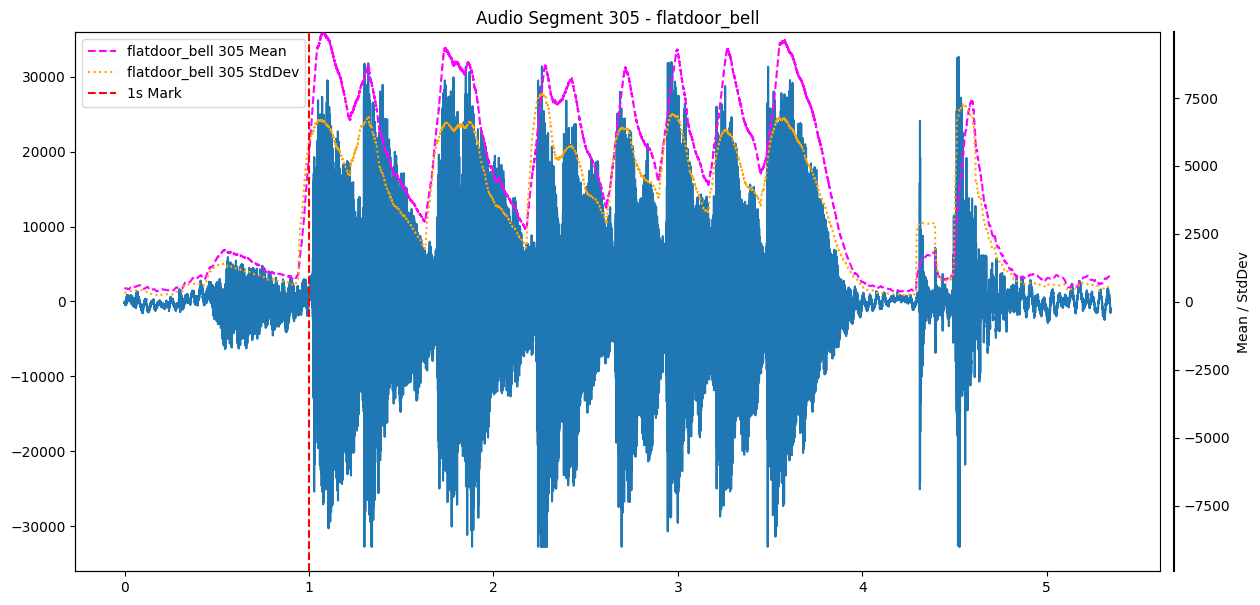

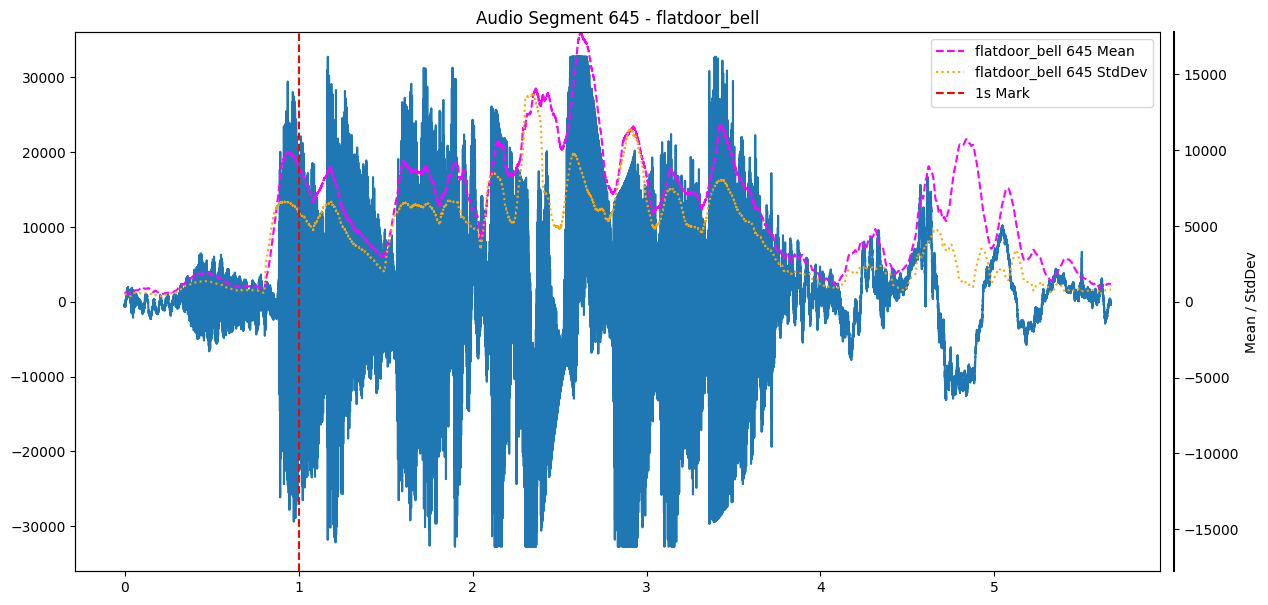

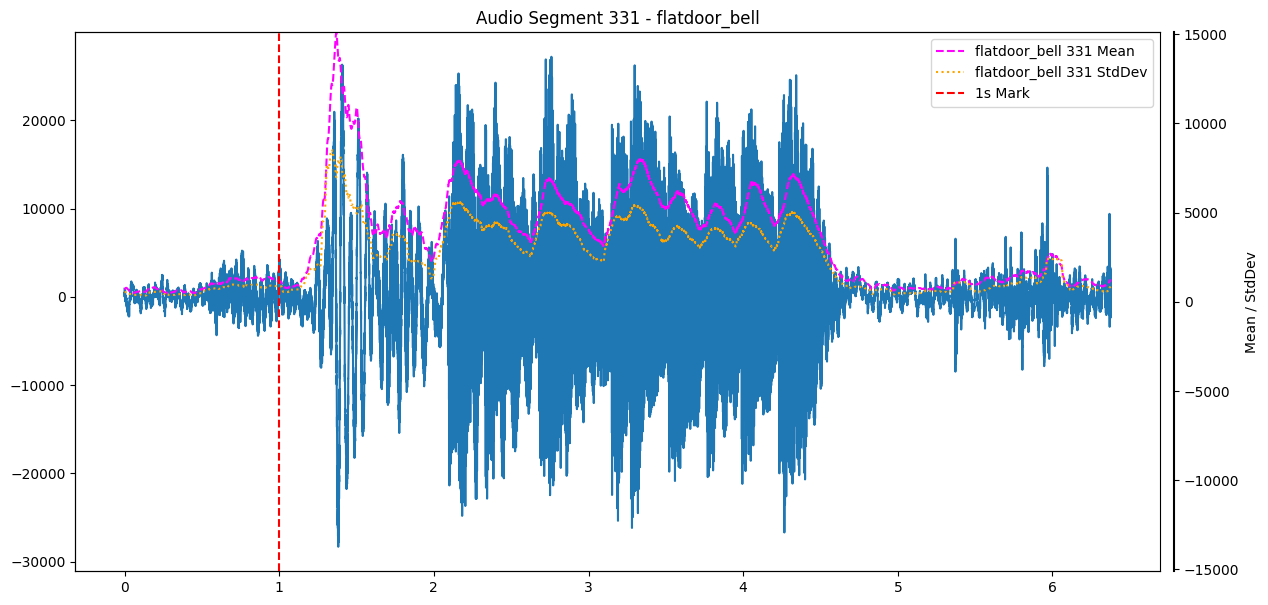

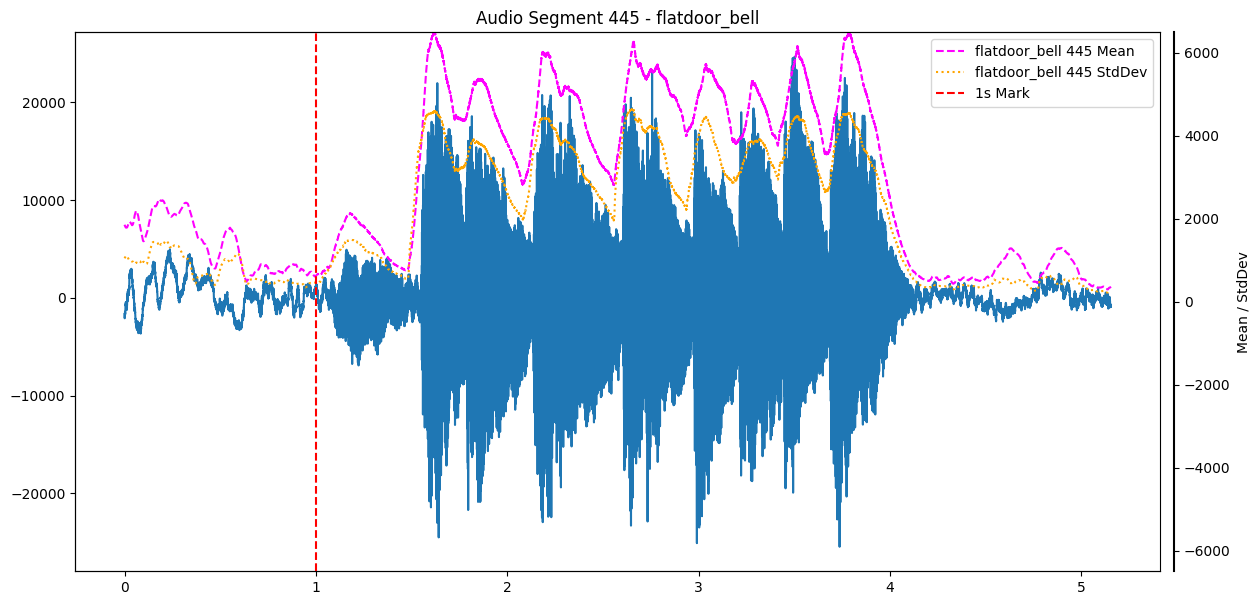

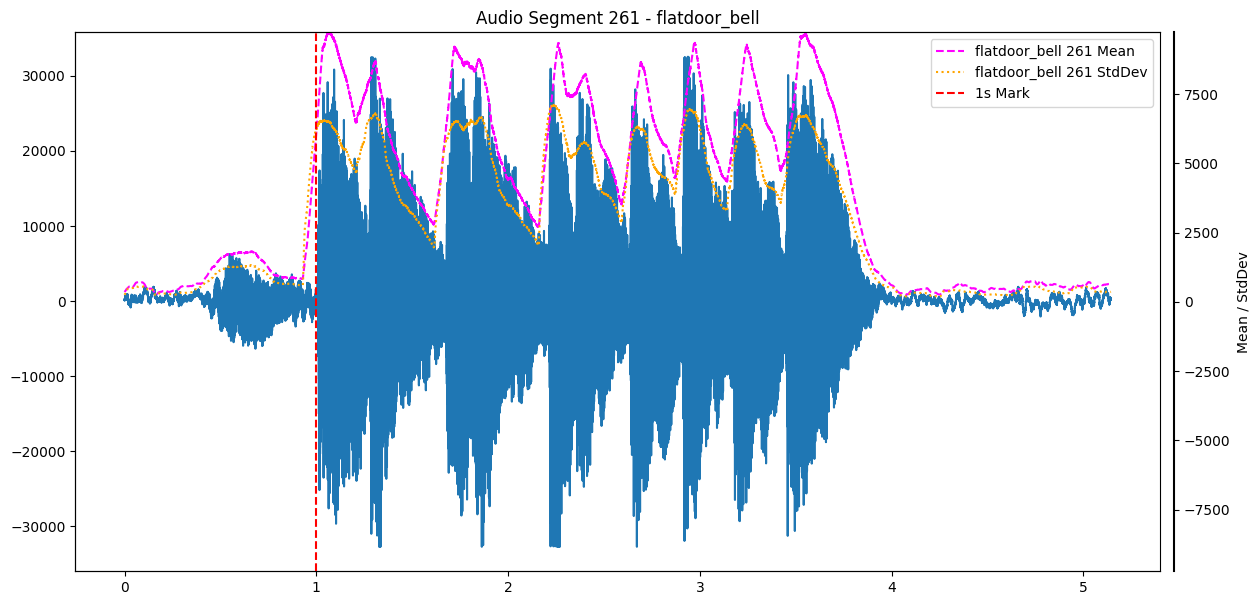

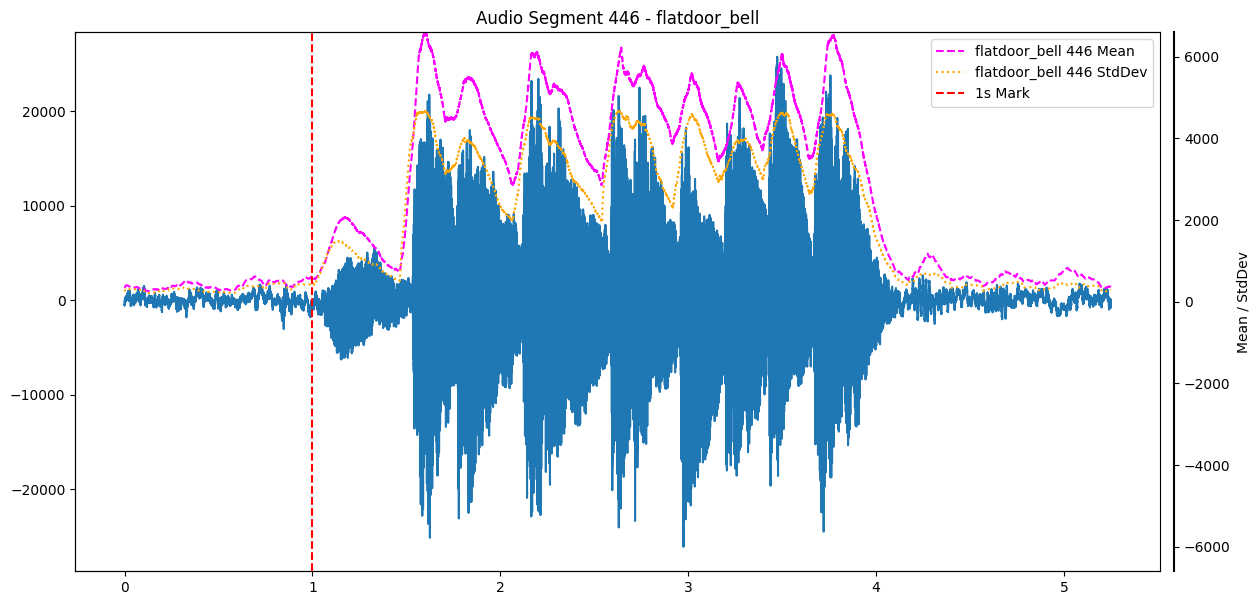

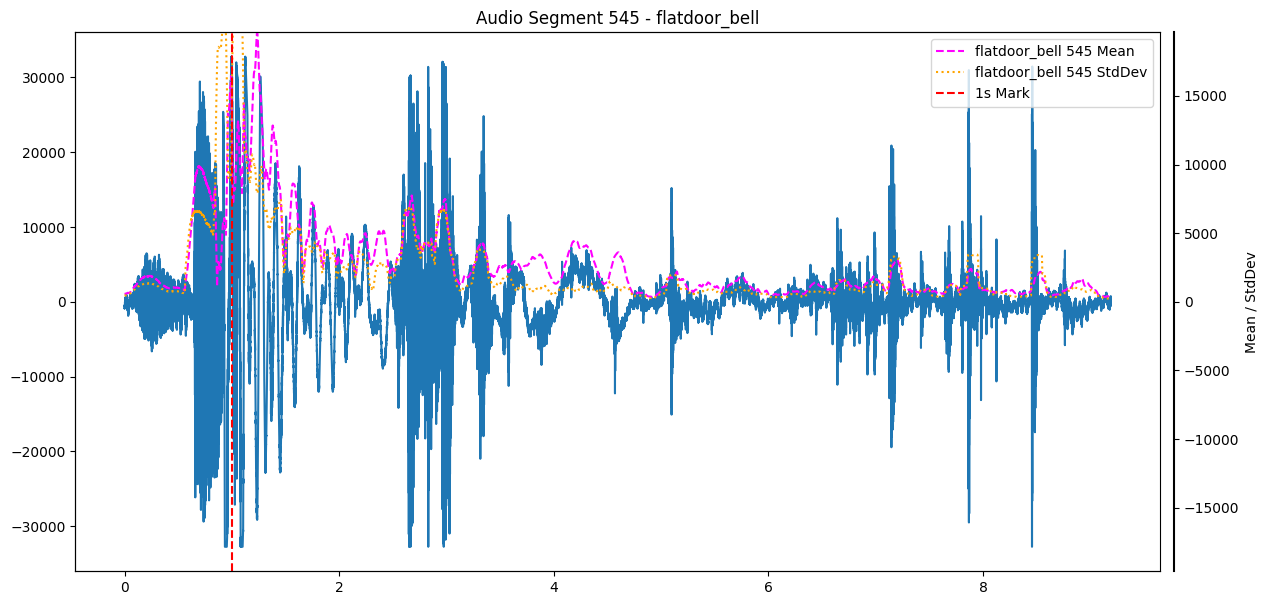

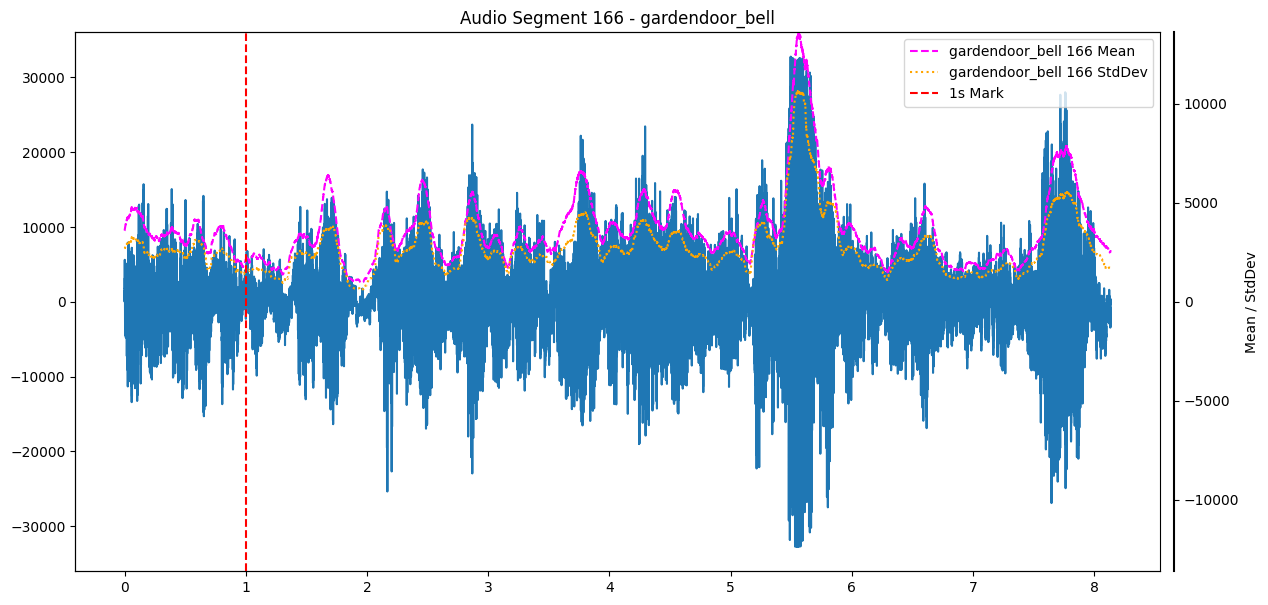

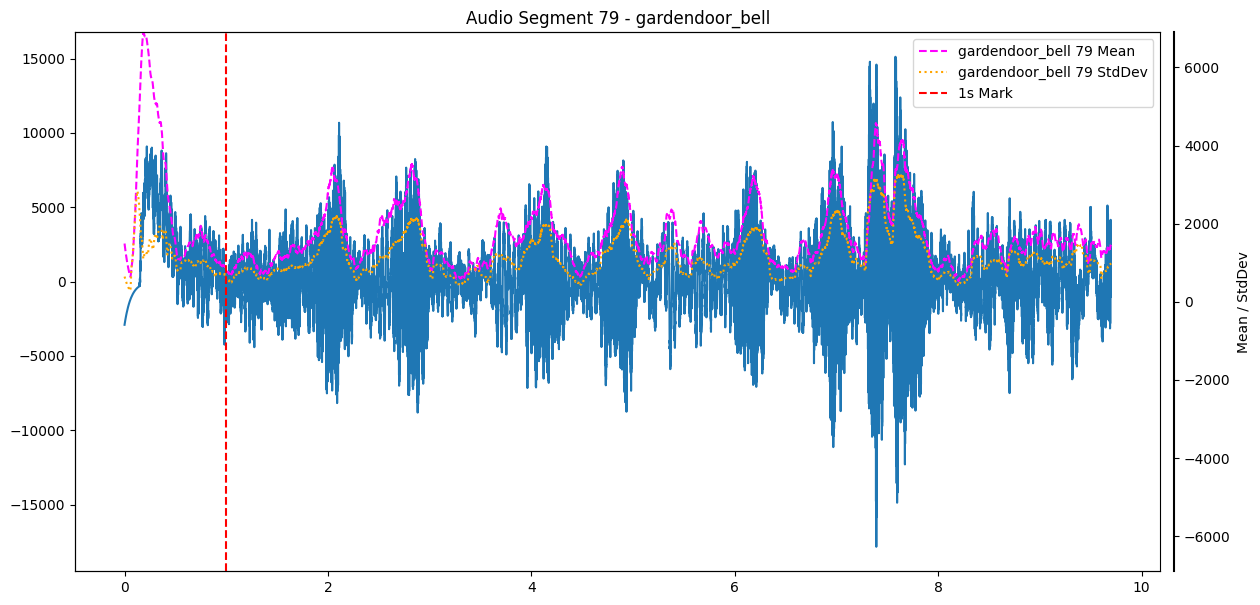

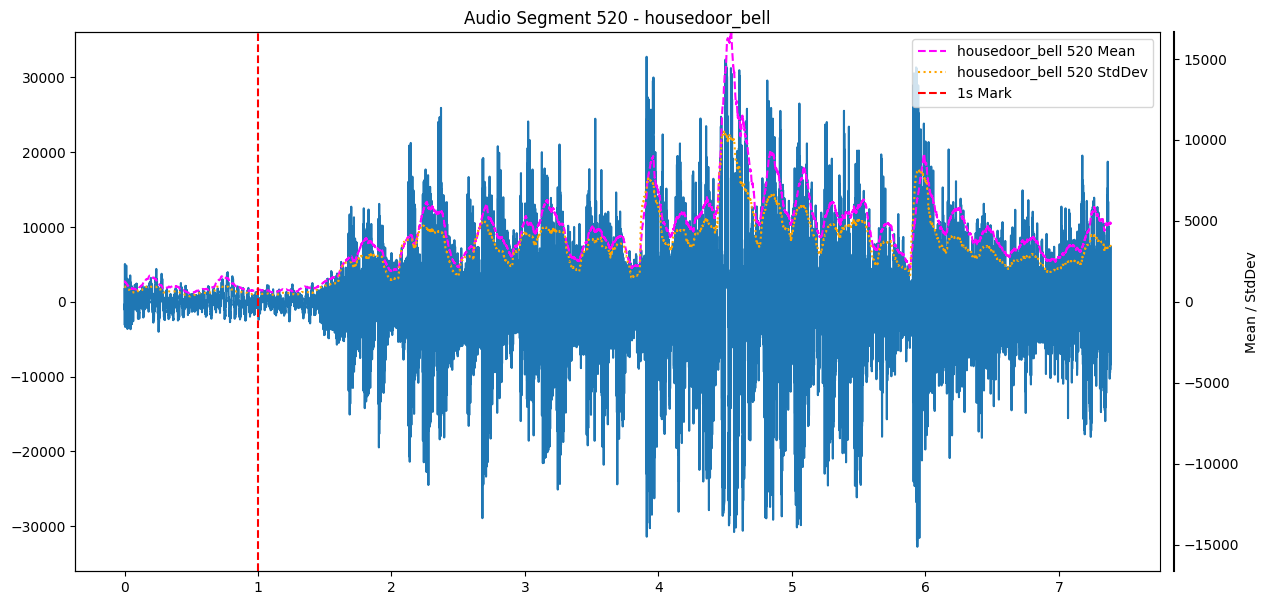

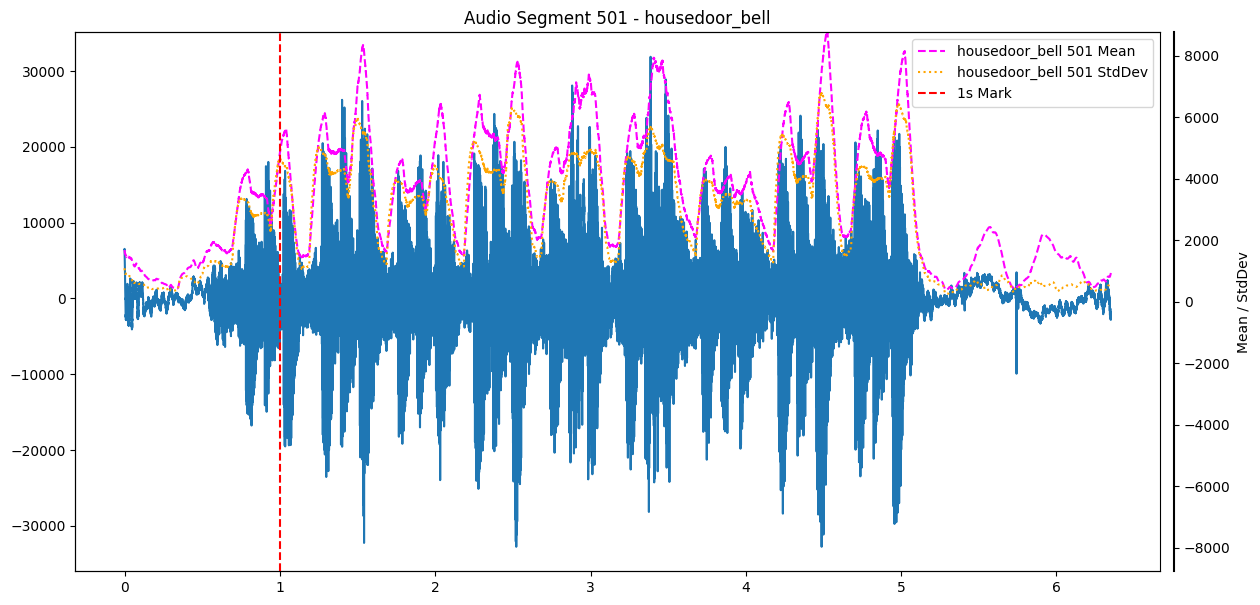

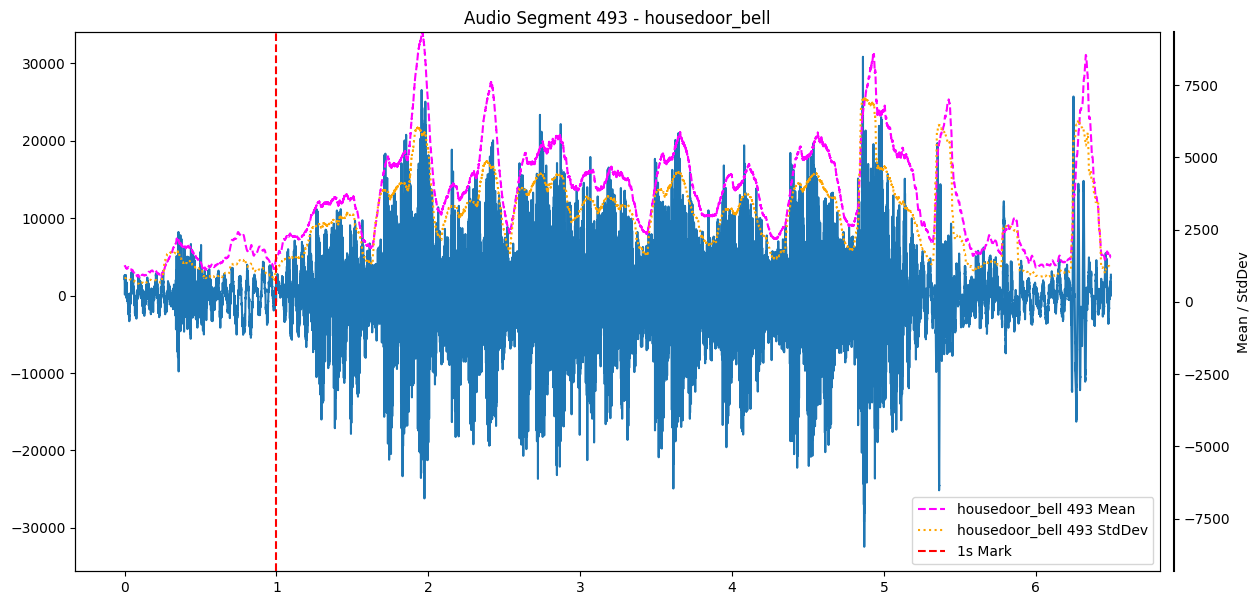

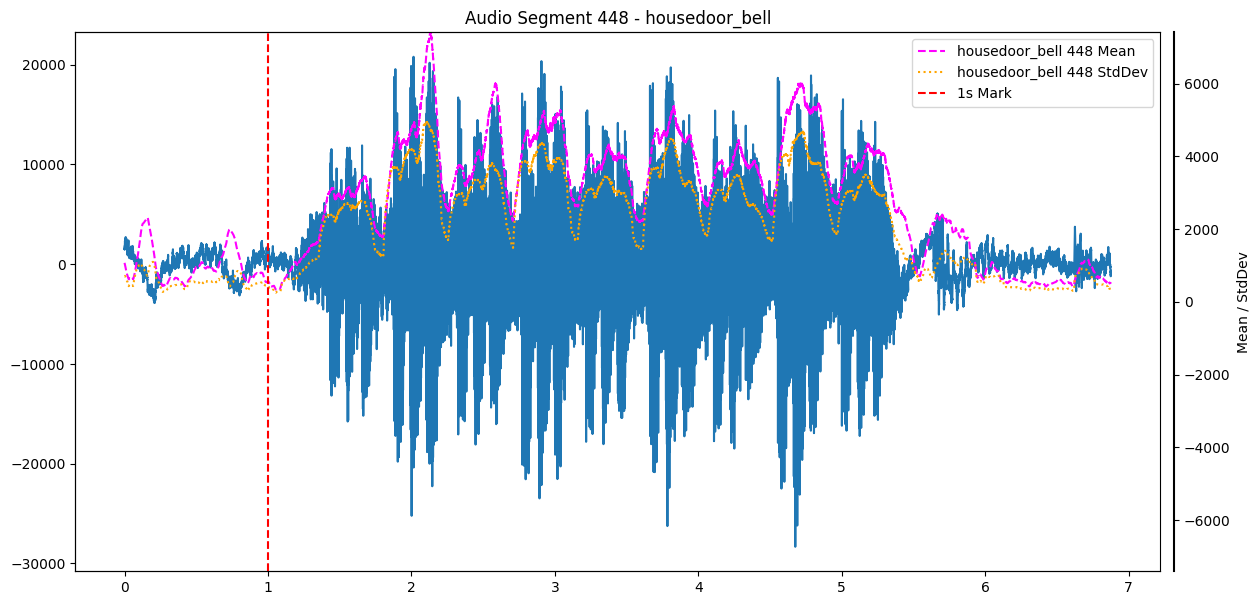

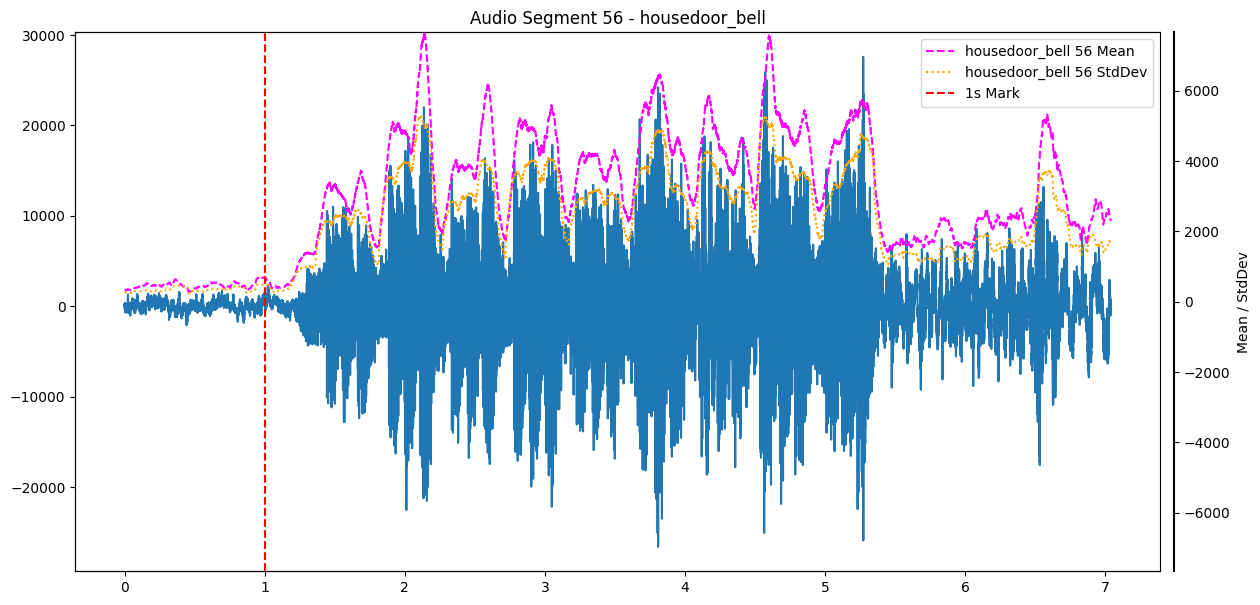

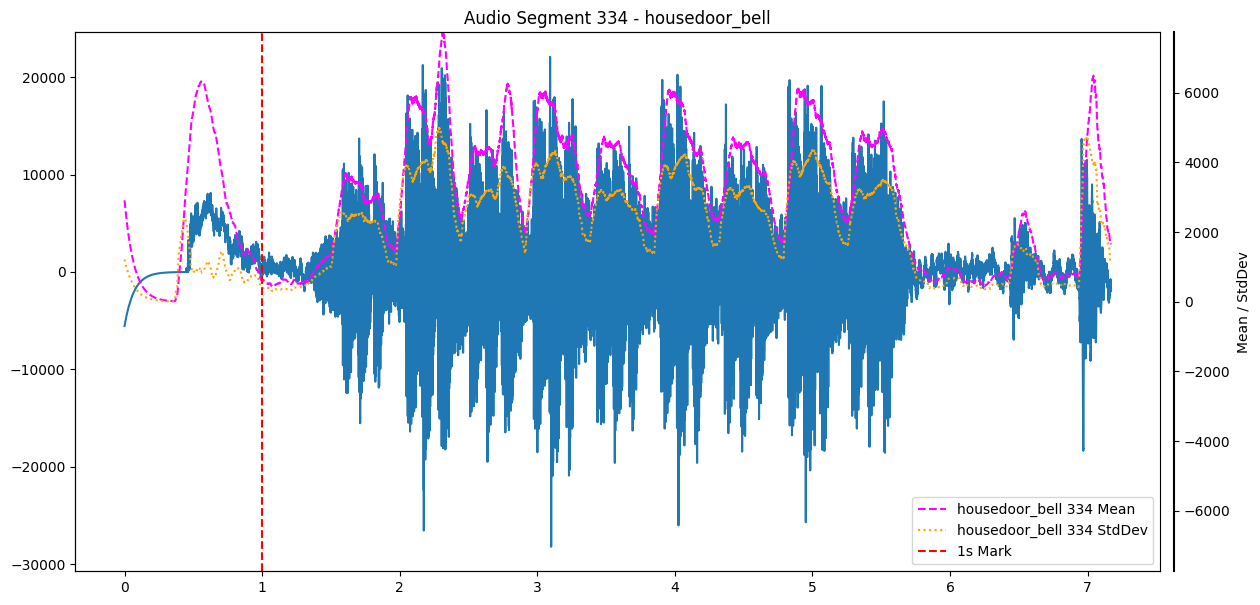

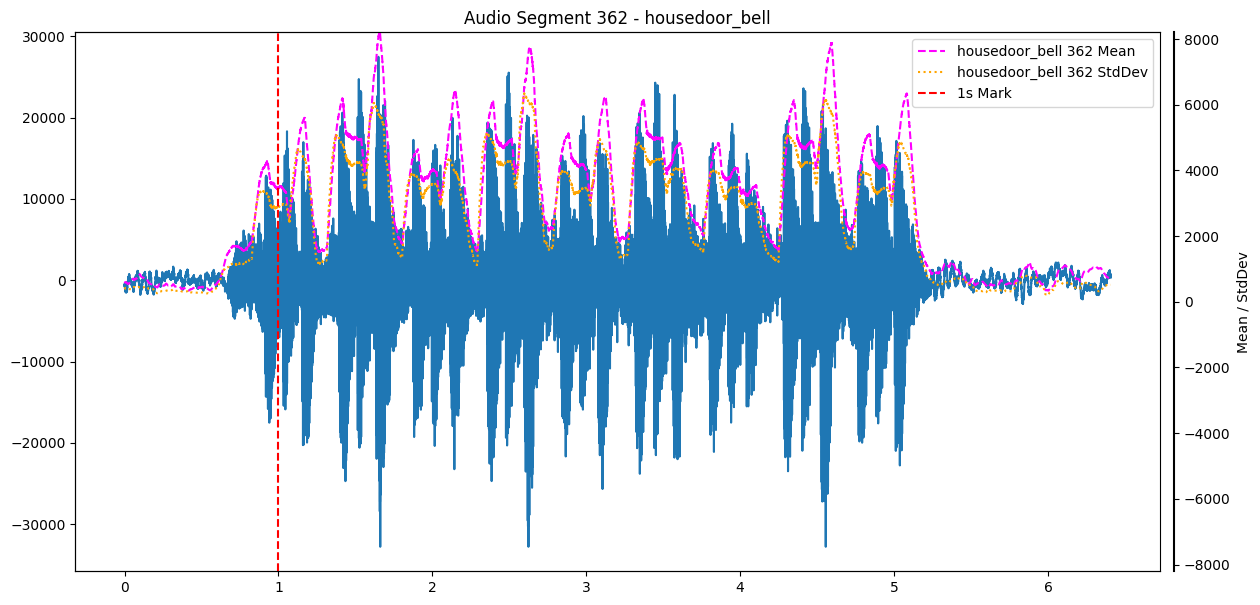

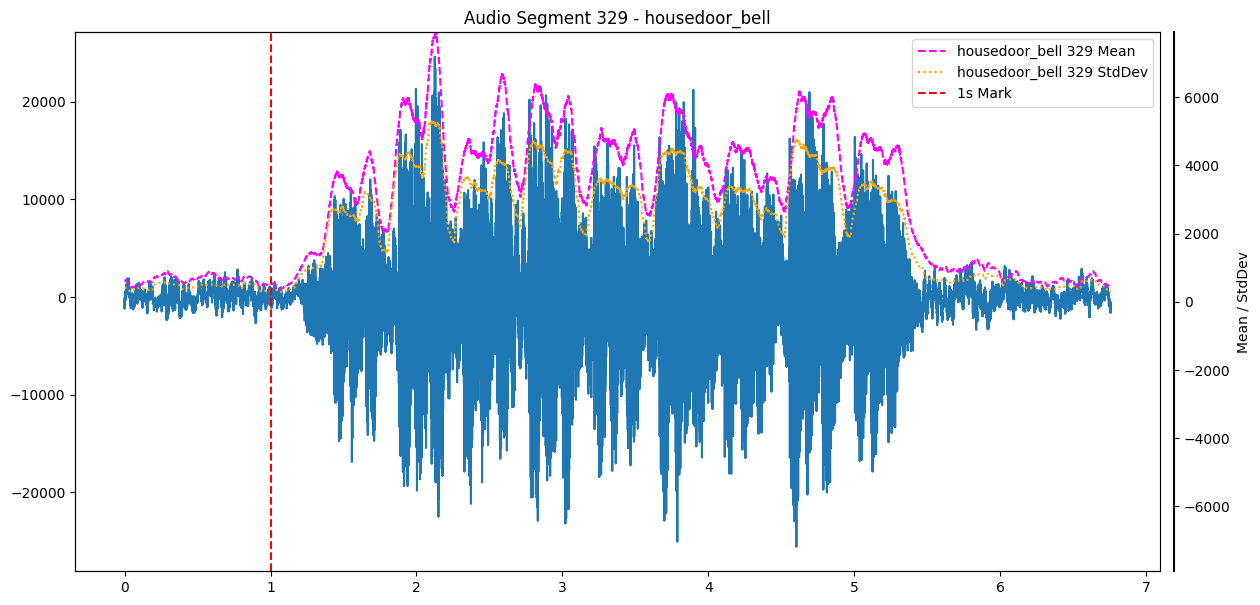

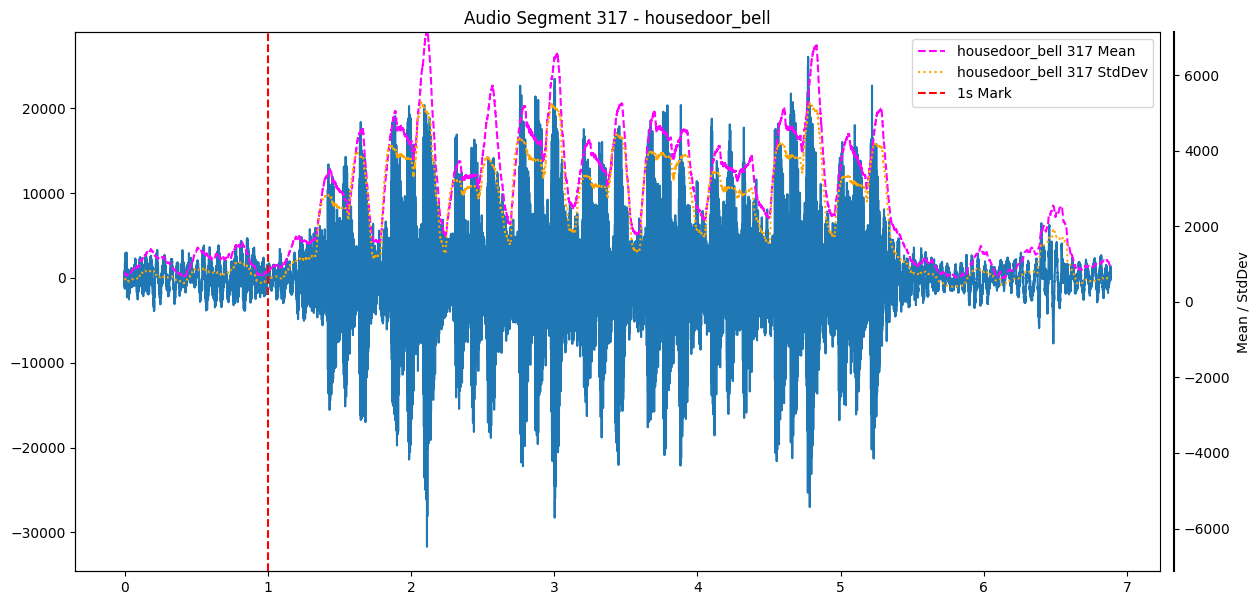

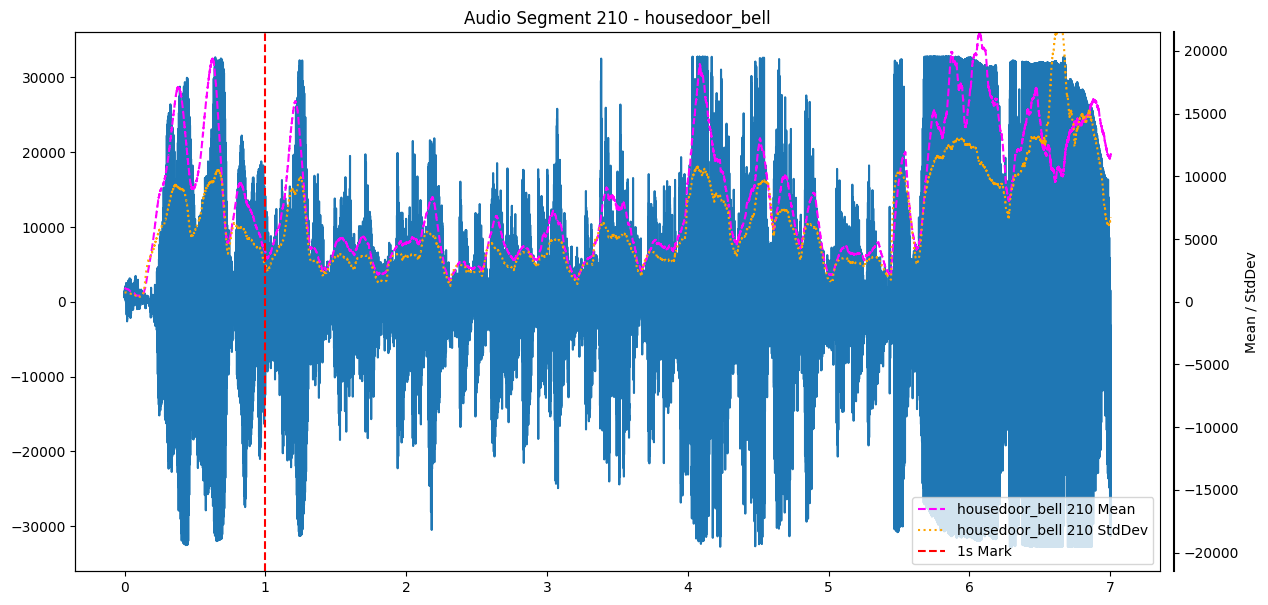

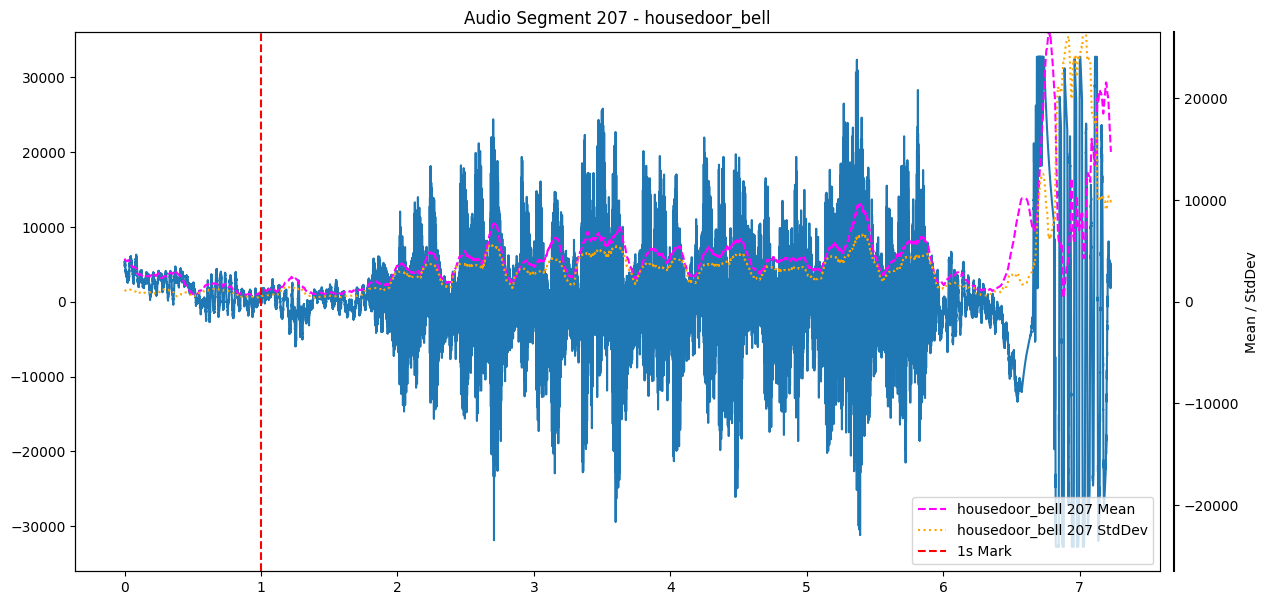

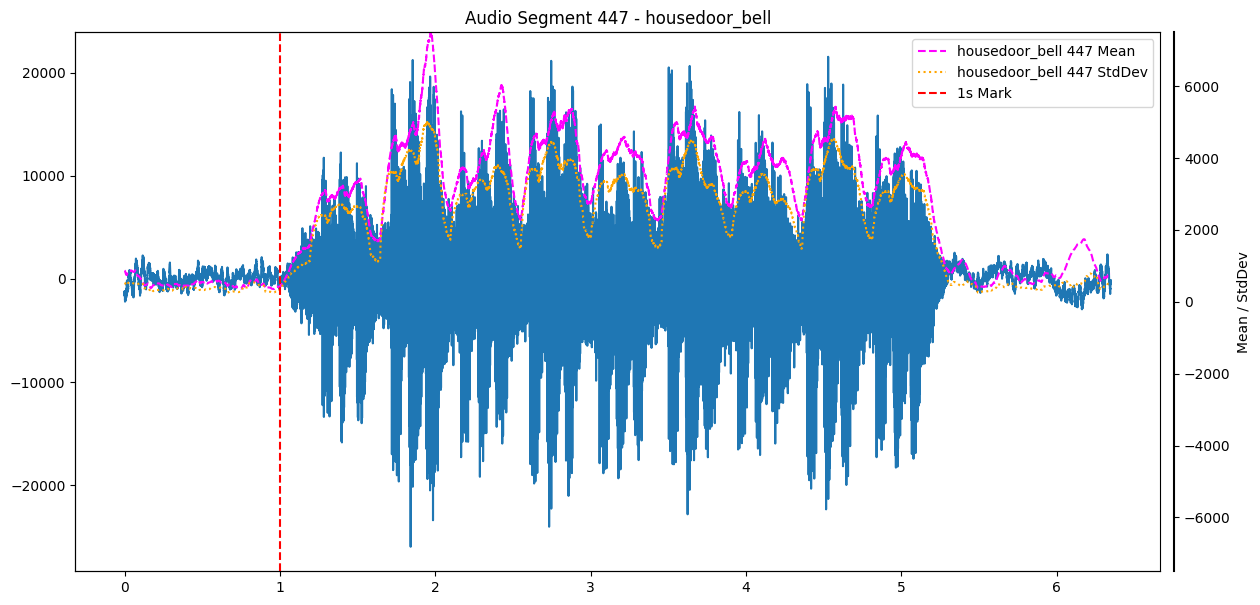

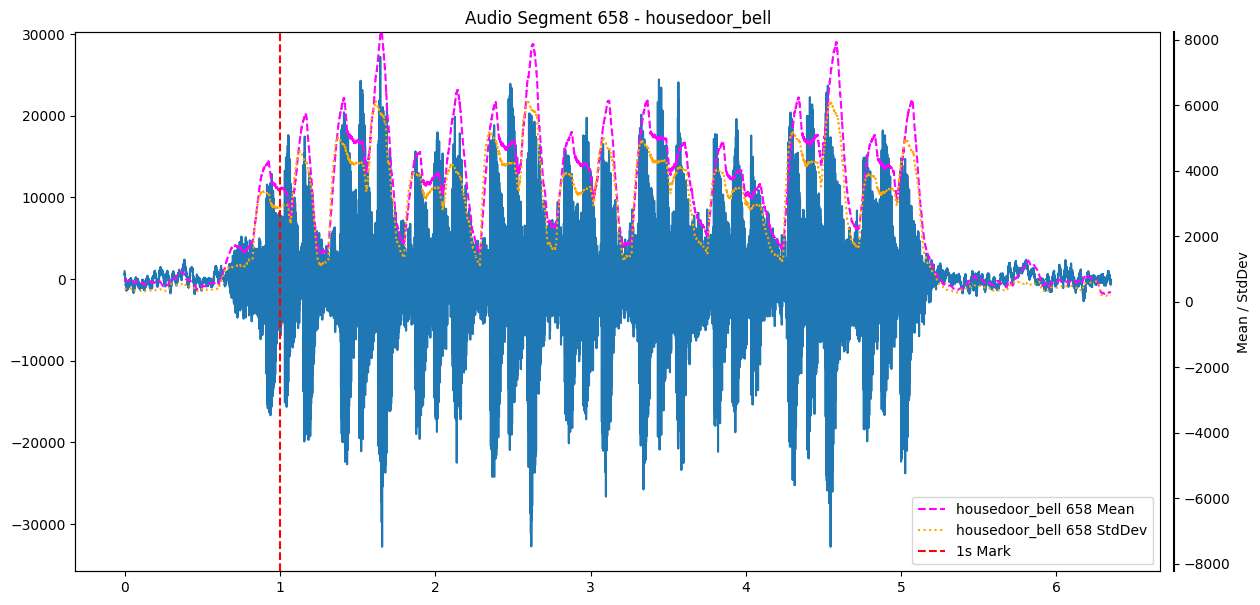

In [9]:
import plotly.graph_objects as go

# Add mean with sliding window of 100ms

import matplotlib.pyplot as plt
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


for index, row in filtered_annotations.iterrows():
    duration = row['duration'] + 2  # +2 to account for the 1s padding on both sides
    sample_rate = len(row['audio']) / duration
    time_axis = np.linspace(0, duration, len(row['audio']))
    
    window_size = int(0.1 * sample_rate)  # 100ms window size
    
    # Calculate the mean with sliding window
    audio_array = np.array(row['audio'])
    mean_audio = np.convolve(np.abs(audio_array), np.ones(window_size)/window_size, mode='valid')
    mean_time_axis = np.linspace(0, duration, len(mean_audio))
    
    # Calculate the standard deviation with sliding window
    squared_audio = np.square(np.int64(audio_array))
    mean_squared_audio = np.convolve(squared_audio, np.ones(window_size)/window_size, mode='valid')
    stddev_audio = np.sqrt(mean_squared_audio - np.square(mean_audio))
    
    # # Calculate SNR with sliding window
    # snr_window_start_idxs = np.arange(window_size, len(row['audio']) - window_size)
    # snr_window_end_idxs = np.arange(2 * window_size, len(row['audio']))
    # snr_audio_windowed = np.zeros(len(snr_window_end_idxs))
    # for i in range(len(snr_window_start_idxs)):
    #     snr_window_start = snr_window_start_idxs[i]
    #     snr_window_end = snr_window_end_idxs[i]
    #     snr = signaltonoise(audio_array[snr_window_start:snr_window_end])
    #     snr_audio_windowed[i] = snr
    
    # Create a new figure for each audio segment
    plt.figure(figsize=(14, 7))
    
    # Plot the original audio waveform
    plt.plot(time_axis, audio_array, label=f"{row['label']} {index}")
    
    # Plot the mean audio waveform
    # Create a twin y-axis to plot Mean and StdDev
    ax2 = plt.gca().twinx()
    
    # Plot the mean audio waveform
    ax2.plot(mean_time_axis, mean_audio, label=f"{row['label']} {index} Mean", linestyle='--', color='magenta')
    
    # Plot the standard deviation audio waveform
    ax2.plot(mean_time_axis, stddev_audio, label=f"{row['label']} {index} StdDev", linestyle=':', color='orange')
    
    # Move the axis to the right and scale it properly
    ax2.spines['right'].set_position(('outward', 10))
    ax2.spines['right'].set_linewidth(1.5)
    ax2.spines['right'].set_color('black')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.tick_params(axis='y', colors='black')
    ax2.yaxis.label.set_color('black')
    ax2.set_ylabel('Mean / StdDev')
    ax2.set_ylim(-mean_audio.max(), mean_audio.max())
    

    # Create a twin y-axis to plot SNR
    # ax2 = plt.gca().twinx()
    # ax2.plot(snr_window_start_idxs / sample_rate, snr_audio_windowed, label=f"{row['label']} {index} SNR", linestyle='-.', color='blue')
    
    # # Move the axis to the right and scale it properly
    # ax2.spines['right'].set_position(('outward', 10))
    # ax2.spines['right'].set_linewidth(1.5)
    # ax2.spines['right'].set_color('blue')
    # ax2.yaxis.set_label_position("right")
    # ax2.yaxis.tick_right()
    # ax2.tick_params(axis='y', colors='blue')
    # ax2.yaxis.label.set_color('blue')
    # ax2.set_ylabel('SNR')
    
    # Add a vertical line at 1s
    plt.axvline(x=1, color='red', linestyle='--', label='1s Mark')
    
    # Update layout
    plt.title(f'Audio Segment {index} - {row["label"]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mean / StdDev')
    plt.legend()
    
    # Show the figure
    plt.show()


Some of the samples are very noisy, but for estimating some mean value when to start recording for the data collection script, this should be enough. Looks like when the mean reaches 1000 I should record everything wich is about 200ms before and do some recording for 7 seconds.

# Feature extraction
This section is dome explorative experimentation regarding feature extraction. I will start with Mel-Ceptrum features.

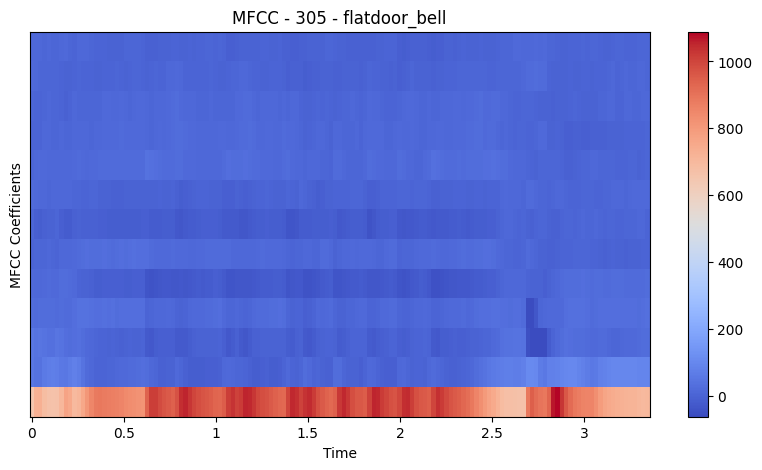

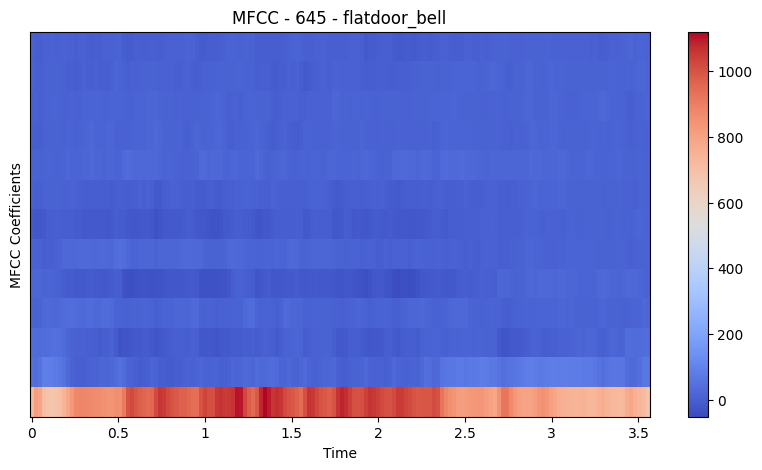

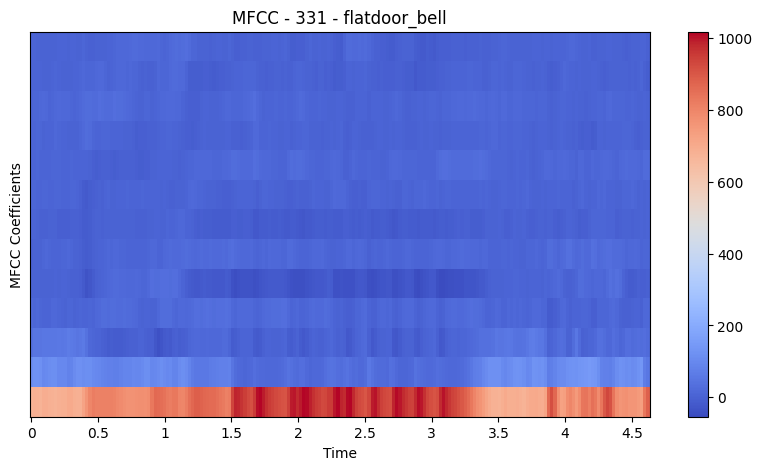

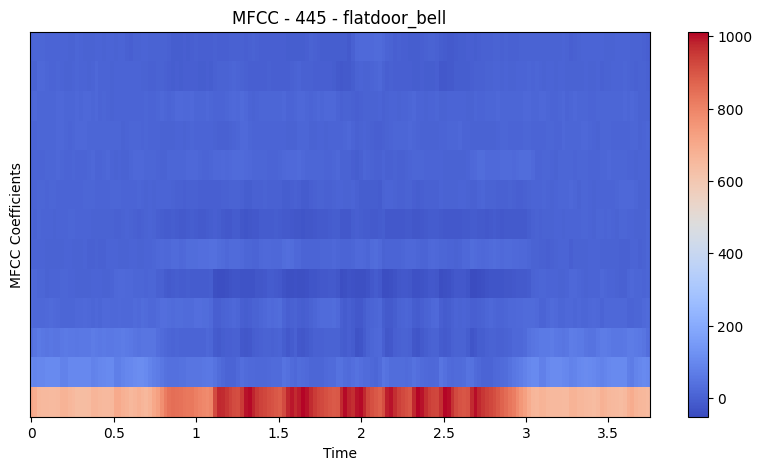

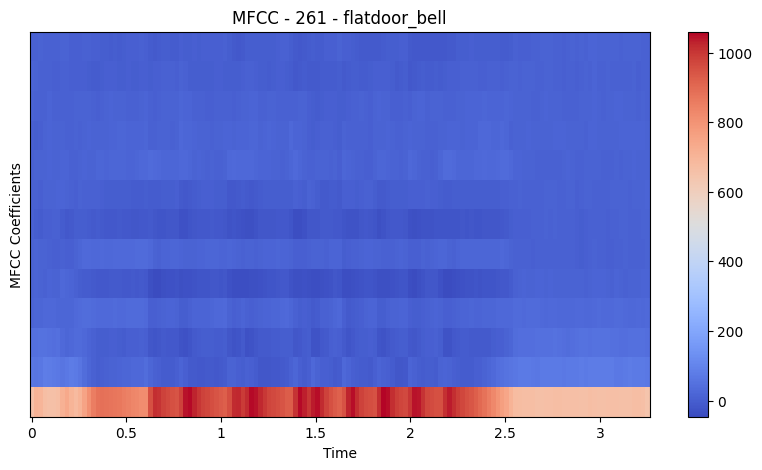

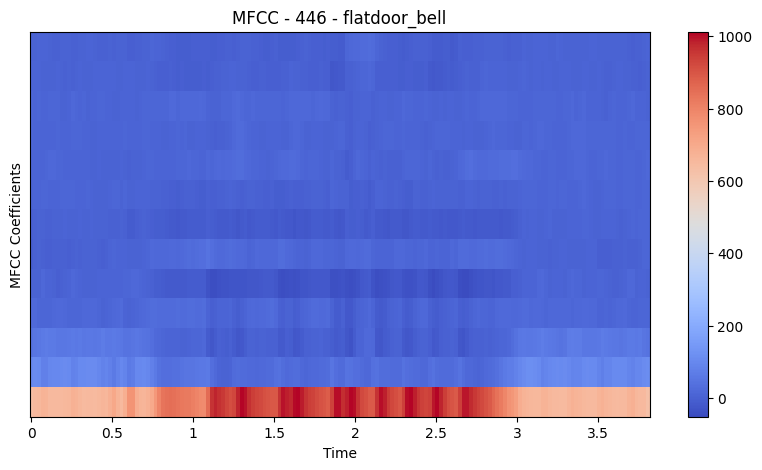

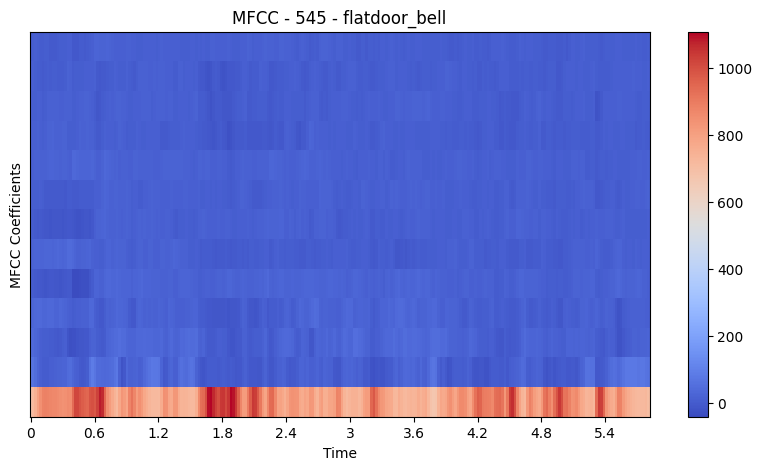

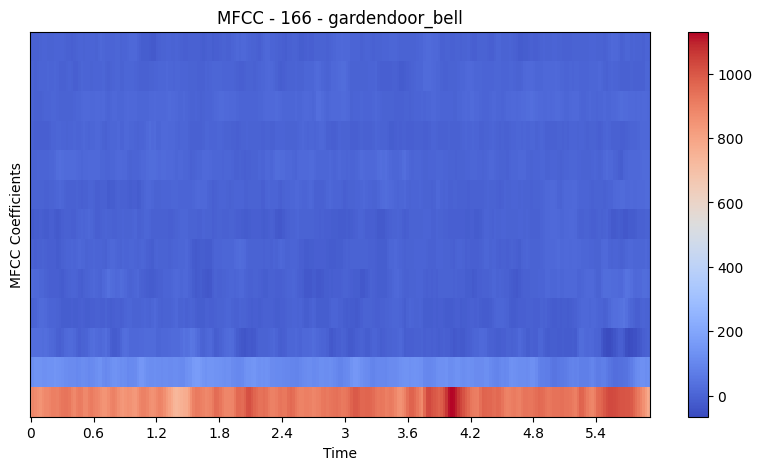

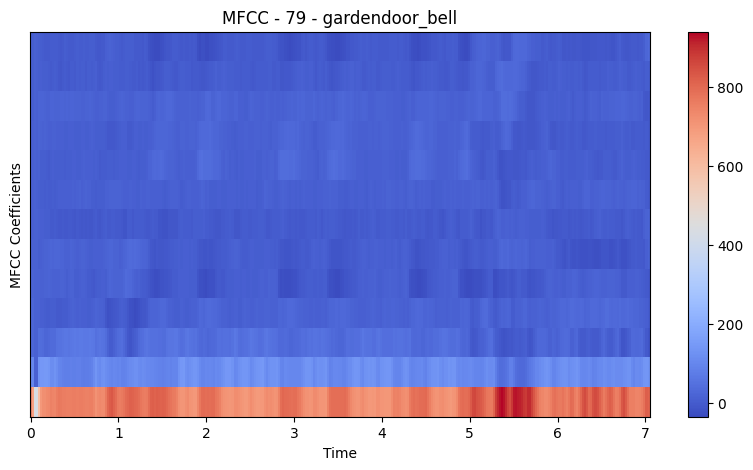

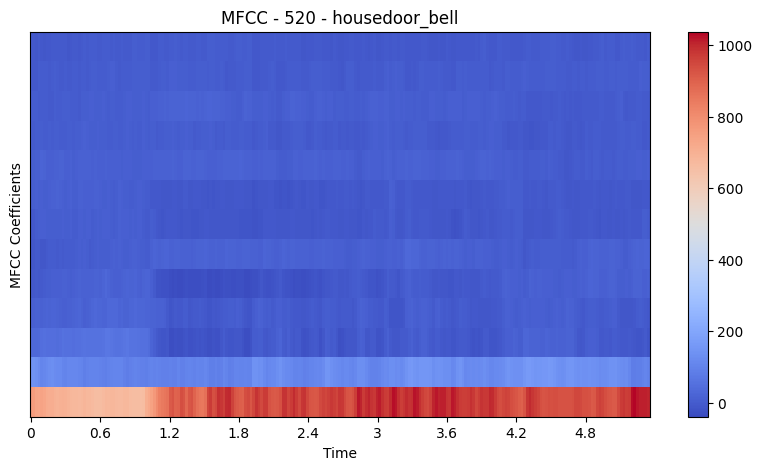

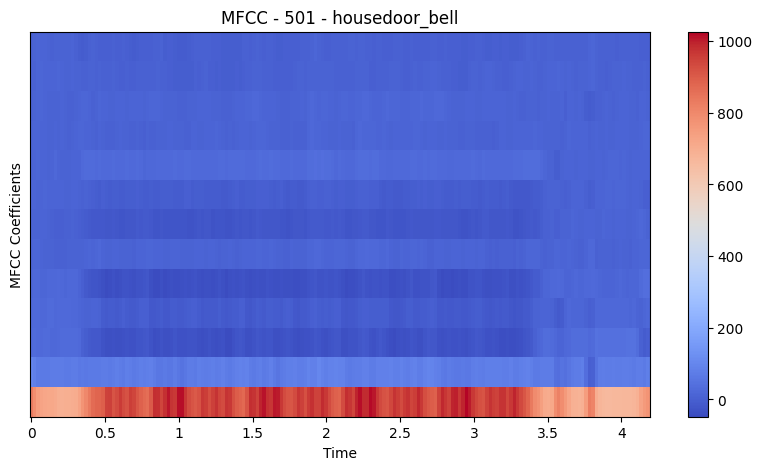

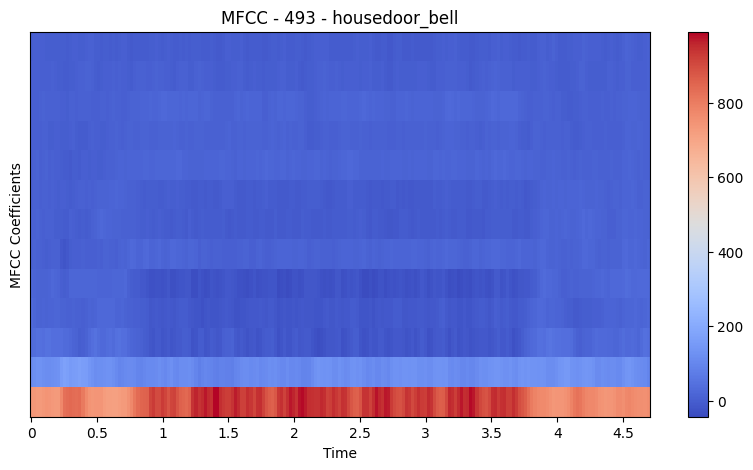

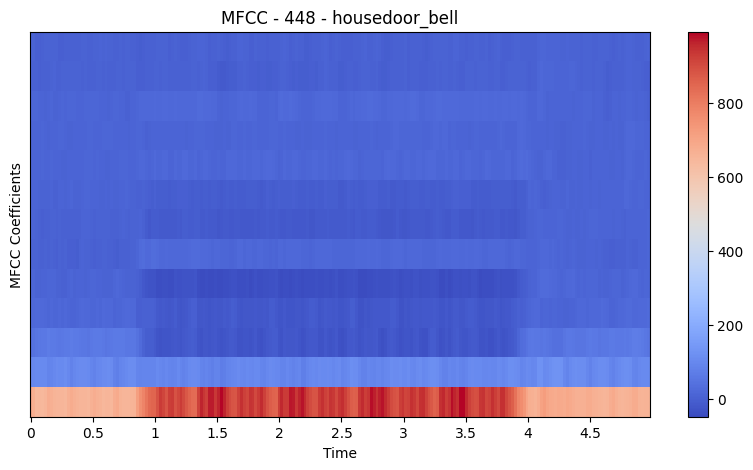

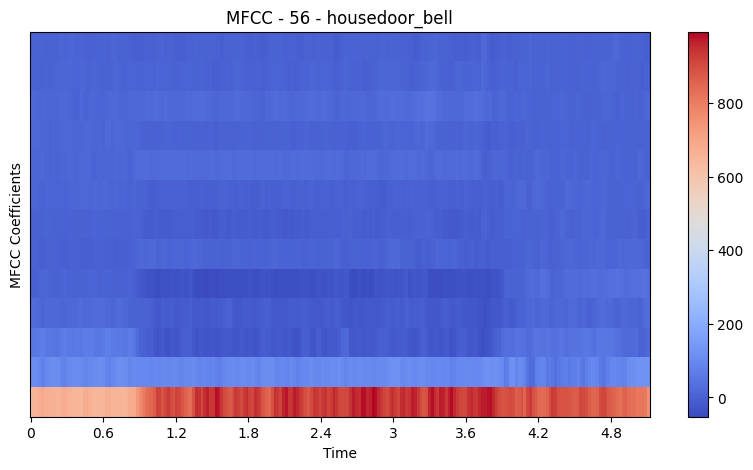

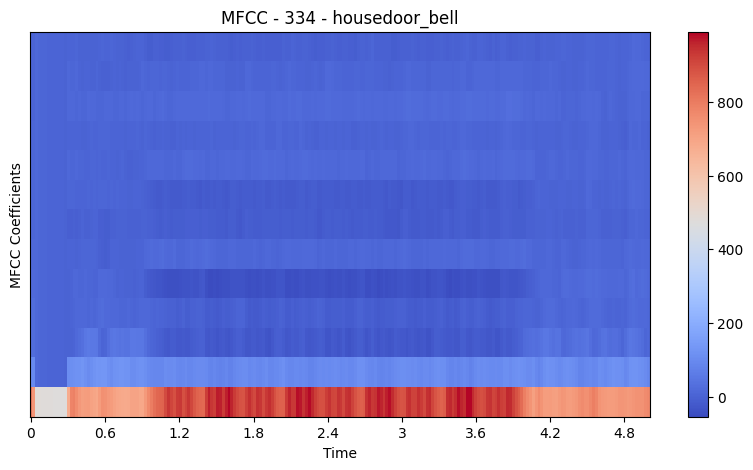

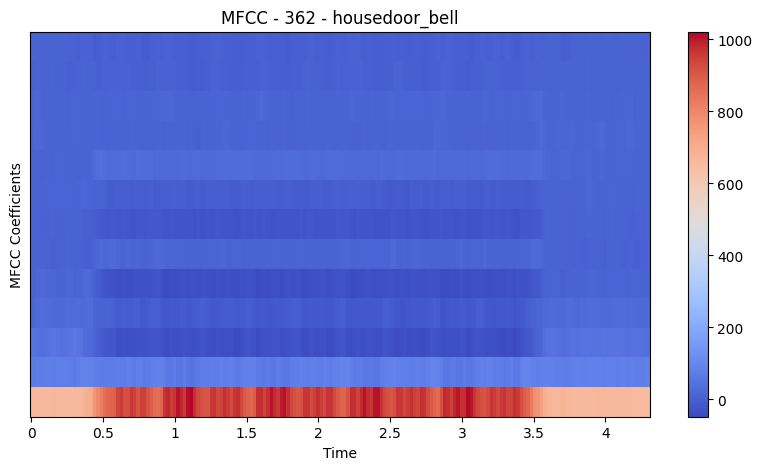

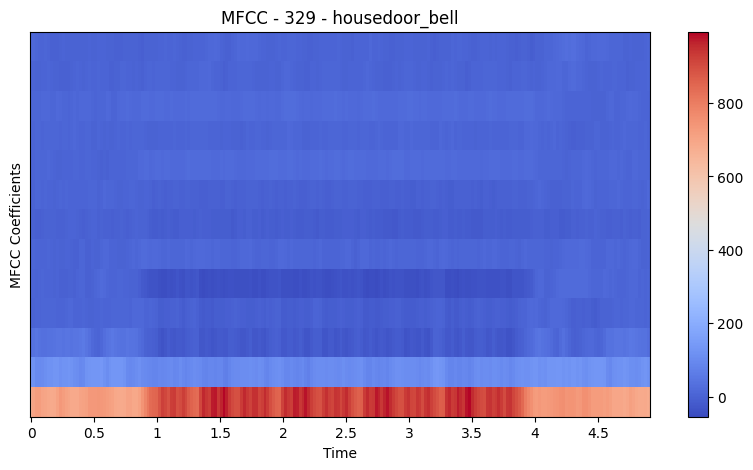

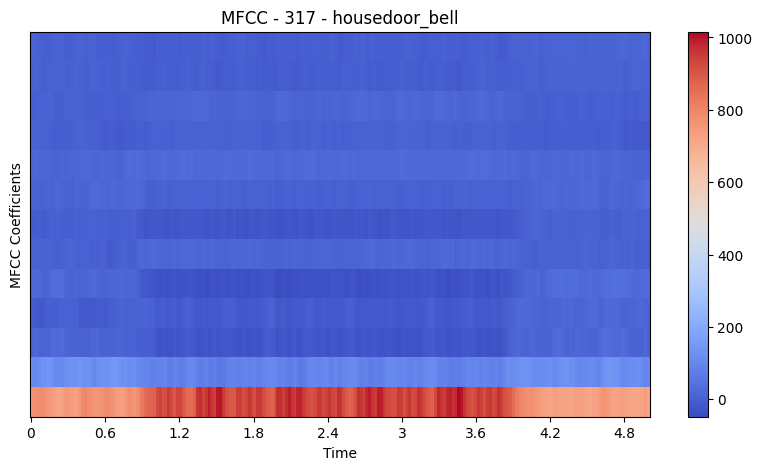

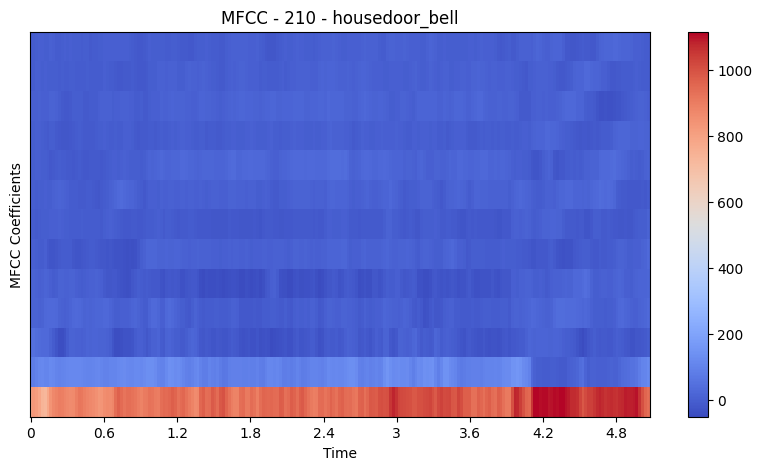

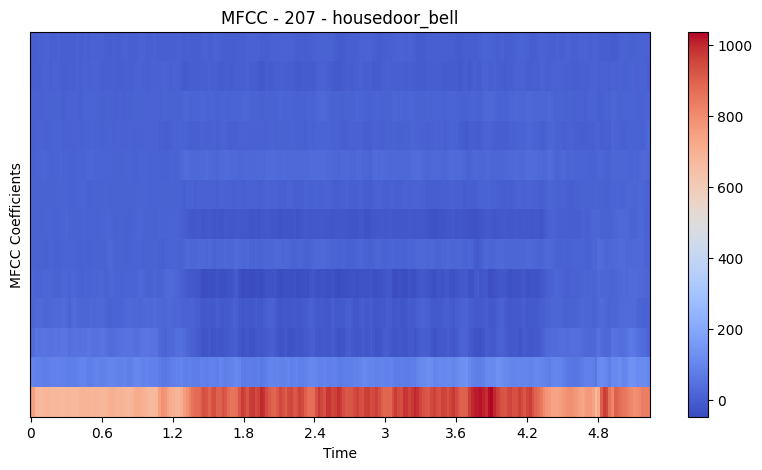

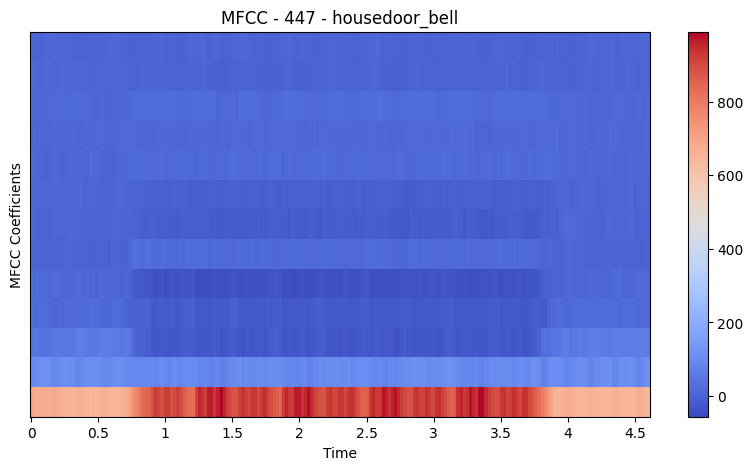

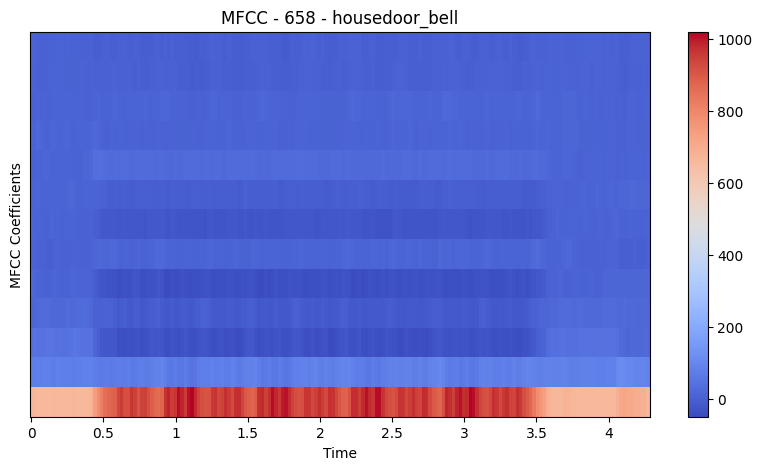

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

for index, row in filtered_annotations.iterrows():
    duration = row['duration'] + 2  # +2 to account for the 1s padding on both sides
    sample_rate = len(row['audio']) / duration

    mfccs = librosa.feature.mfcc(y=np.array(row['audio'], dtype=np.float64), sr=sample_rate, n_mfcc=13)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {index} - {row["label"]}')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()

Ok, the information seem to be almost completly in the lower coefficients, but some artifacts are also in the higher components (to be honest, I am not sure whether this is by nature of MCF).
In some samples it is quite easy to see that when the ring starts, on others it's much harder (probably the noisy ones). At least the housedoor bell (my desired main target) seems to be quite easy to ditinguish. Netxt I need to determine how big the audio chunks should be (I think about 100ms - 500ms) to start training on.